In [336]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

In [337]:
pho_hg = 13596  # kg / m^3
g      = 9.8    # m / sec^2

sigm_h = 0.05   # мм.
R      = 8.32


In [338]:
Measurment = namedtuple ("Measurment", ["T", "h_bot", "h_top"]) # T in Celciums, h in mm

In [339]:
def cels_to_kelv (measurment: Measurment):
    new_measurment = Measurment (measurment.T + 273, measurment.h_bot, measurment.h_top)
    return new_measurment

In [340]:
heating = [
           Measurment (23, 7.3,  9.29),
           Measurment (25, 7.2,  9.36),
           Measurment (27, 7.19, 9.52),
           Measurment (29, 7.05, 9.68),
           Measurment (31, 6.88, 9.84),
           Measurment (33, 6.70, 10.19),
           Measurment (35, 6.59, 10.34),
           Measurment (37, 6.24, 10.59),
           Measurment (39, 5.98, 10.81),
           Measurment (41, 5.68, 11.16),
]

cooling = [
           Measurment (23, 7.38, 9.30),
           Measurment (25, 7.24, 9.49),
           Measurment (27, 7.10, 9.60),
           Measurment (29, 6.98, 9.73),
           Measurment (31, 6.76, 9.97),
           Measurment (33, 6.60, 10.19),
           Measurment (35, 6.39, 10.42),
           Measurment (37, 6.19, 10.60),
           Measurment (39, 5.94, 10.90),
           Measurment (41, 5.68, 11.16),
]

heating = list(map(lambda mes: cels_to_kelv (mes), heating))
cooling = list(map(lambda mes: cels_to_kelv (mes), cooling))

assert (len(heating) == len(cooling))
data_len = len(heating)

In [341]:
def count_P (measurment: Measurment):
    delta_h = measurment.h_top - measurment.h_bot   # in mm
    # P = pho_hg * g * delta_h / 1000
    P = 133.322 * delta_h
    return P

In [342]:
heatings_P = dict(map(lambda mes: (mes.T, count_P(mes)), heating))
coolings_P = dict(map(lambda mes: (mes.T, count_P(mes)), cooling))

In [343]:
for i in range(data_len):
    heat_mes = heating[i]
    cool_mes = cooling[i]

    print (f"{heat_mes.T}\t& {heat_mes.h_bot}\t& {heat_mes.h_top}\t& {heatings_P[heat_mes.T]:.2f}\t& \t& ", end="")
    print (f"{cool_mes.T}\t& {cool_mes.h_bot}\t& {cool_mes.h_top}\t& {coolings_P[cool_mes.T]:.2f}\t\\\\ \\cline{{1-4}} \\cline{{6-9}}",    )

296	& 7.3	& 9.29	& 265.31	& 	& 296	& 7.38	& 9.3	& 255.98	\\ \cline{1-4} \cline{6-9}
298	& 7.2	& 9.36	& 287.98	& 	& 298	& 7.24	& 9.49	& 299.97	\\ \cline{1-4} \cline{6-9}
300	& 7.19	& 9.52	& 310.64	& 	& 300	& 7.1	& 9.6	& 333.31	\\ \cline{1-4} \cline{6-9}
302	& 7.05	& 9.68	& 350.64	& 	& 302	& 6.98	& 9.73	& 366.64	\\ \cline{1-4} \cline{6-9}
304	& 6.88	& 9.84	& 394.63	& 	& 304	& 6.76	& 9.97	& 427.96	\\ \cline{1-4} \cline{6-9}
306	& 6.7	& 10.19	& 465.29	& 	& 306	& 6.6	& 10.19	& 478.63	\\ \cline{1-4} \cline{6-9}
308	& 6.59	& 10.34	& 499.96	& 	& 308	& 6.39	& 10.42	& 537.29	\\ \cline{1-4} \cline{6-9}
310	& 6.24	& 10.59	& 579.95	& 	& 310	& 6.19	& 10.6	& 587.95	\\ \cline{1-4} \cline{6-9}
312	& 5.98	& 10.81	& 643.95	& 	& 312	& 5.94	& 10.9	& 661.28	\\ \cline{1-4} \cline{6-9}
314	& 5.68	& 11.16	& 730.60	& 	& 314	& 5.68	& 11.16	& 730.60	\\ \cline{1-4} \cline{6-9}


In [344]:
total_sigm = 133.322  * 2 * (sigm_h ** 2)
total_sigm 

0.6666100000000001

In [345]:
total_sigm / np.mean (list(heatings_P.values())) * 100, total_sigm / np.mean (list(coolings_P.values())) * 100

(0.14718869590815428, 0.1424501424501425)

# fitting poly P = $A \cdot e^{B \cdot T}$

In [346]:
T_heat = np.array ([mes.T for mes in heating])
P_heat = list(heatings_P.values())

T_cool = np.array ([mes.T for mes in cooling])
P_cool = list(coolings_P.values())

B_h, A_h = np.polyfit(T_heat, np.log(P_heat), 1)
B_c, A_c = np.polyfit(T_cool, np.log(P_cool), 1)

A_h = np.exp(A_h)
A_c = np.exp(A_c)

In [347]:
poly_X_h = np.arange (T_heat.min(), T_heat.max(), 0.01)
poly_X_c = np.arange (T_cool.min(), T_cool.max(), 0.01)

poly_Y_h = A_h * np.exp (poly_X_h * B_h)
poly_Y_c = A_c * np.exp (poly_X_c * B_c)

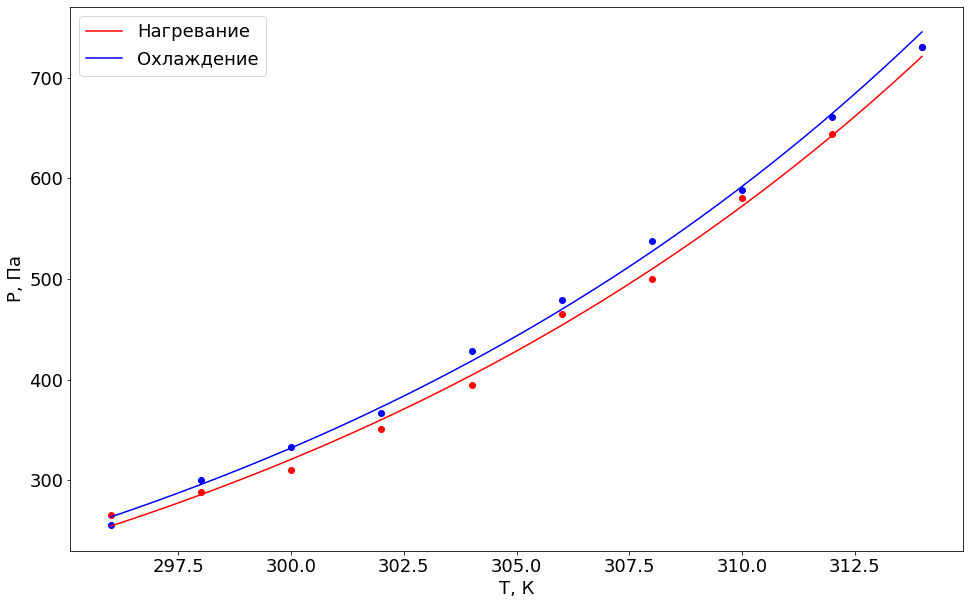

In [348]:
plt.figure(figsize=(16, 10))

plt.plot (poly_X_h, poly_Y_h, "red" , label="Нагревание")
plt.plot (poly_X_c, poly_Y_c, "blue", label="Охлаждение")

plt.scatter (T_heat, P_heat, color="red" )
plt.scatter (T_cool, P_cool, color="blue")

plt.xlabel("T, К")
plt.ylabel("P, Па")
plt.legend()
plt.savefig ("P_from_T.png")
plt.show()

In [349]:
print (A_h, A_c)
print (B_h, B_c)

9.227809398961618e-06 9.833540230566252e-06
0.05788020672321707 0.05778377379408213


In [350]:
def count_L (a, b, mes:Measurment):
    T = mes.T
    P = count_P (mes)
    L = R * T**2 * a * b / (P) * np.exp (b * T)
    return L

In [351]:
L_h_tabl = [count_L(A_h, B_h, heat_mes) for heat_mes in heating]
L_c_tabl = [count_L(A_h, B_h, cool_mes) for cool_mes in cooling]

In [352]:
for i in range(data_len):
    heat_mes = heating[i]
    cool_mes = cooling[i]

    print (f"{heat_mes.T}\t& {heatings_P[heat_mes.T]:.2f}\t& {count_L(A_h, B_h, heat_mes)/1000:.2f}\t& \t& ", end="")
    print (f"{cool_mes.T}\t& {coolings_P[cool_mes.T]:.2f}\t& {count_L(A_c, B_c, cool_mes)/1000:.2f}\t\\\\ \\cline{{1-3}} \\cline{{5-7}}",)

296	& 265.31	& 40.47	& 	& 296	& 255.98	& 43.37	\\ \cline{1-3} \cline{5-7}
298	& 287.98	& 42.43	& 	& 298	& 299.97	& 42.11	\\ \cline{1-3} \cline{5-7}
300	& 310.64	& 44.76	& 	& 300	& 333.31	& 43.11	\\ \cline{1-3} \cline{5-7}
302	& 350.64	& 45.11	& 	& 302	& 366.64	& 44.58	\\ \cline{1-3} \cline{5-7}
304	& 394.63	& 45.60	& 	& 304	& 427.96	& 43.44	\\ \cline{1-3} \cline{5-7}
306	& 465.29	& 44.00	& 	& 306	& 478.63	& 44.18	\\ \cline{1-3} \cline{5-7}
308	& 499.96	& 46.57	& 	& 308	& 537.29	& 44.76	\\ \cline{1-3} \cline{5-7}
310	& 579.95	& 45.66	& 	& 310	& 587.95	& 46.51	\\ \cline{1-3} \cline{5-7}
312	& 643.95	& 46.77	& 	& 312	& 661.28	& 47.02	\\ \cline{1-3} \cline{5-7}
314	& 730.60	& 46.88	& 	& 314	& 730.60	& 48.38	\\ \cline{1-3} \cline{5-7}


# $\ln{p}(\frac{1}{T})$

In [353]:
one_over_T_h = 1 / T_heat 
one_over_T_c = 1 / T_cool

ln_P_h       = np.log (P_heat)
ln_P_c       = np.log (P_cool)

In [354]:
A_h, B_h = np.polyfit (one_over_T_h, ln_P_h, 1)
A_c, B_c = np.polyfit (one_over_T_c, ln_P_c, 1)

In [355]:
poly_X_h = np.arange (one_over_T_h.min(), one_over_T_h.max(), 1e-7)
poly_X_c = np.arange (one_over_T_c.min(), one_over_T_c.max(), 1e-7)

poly_Y_h = A_h * poly_X_h + B_h
poly_Y_c = A_c * poly_X_c + B_c

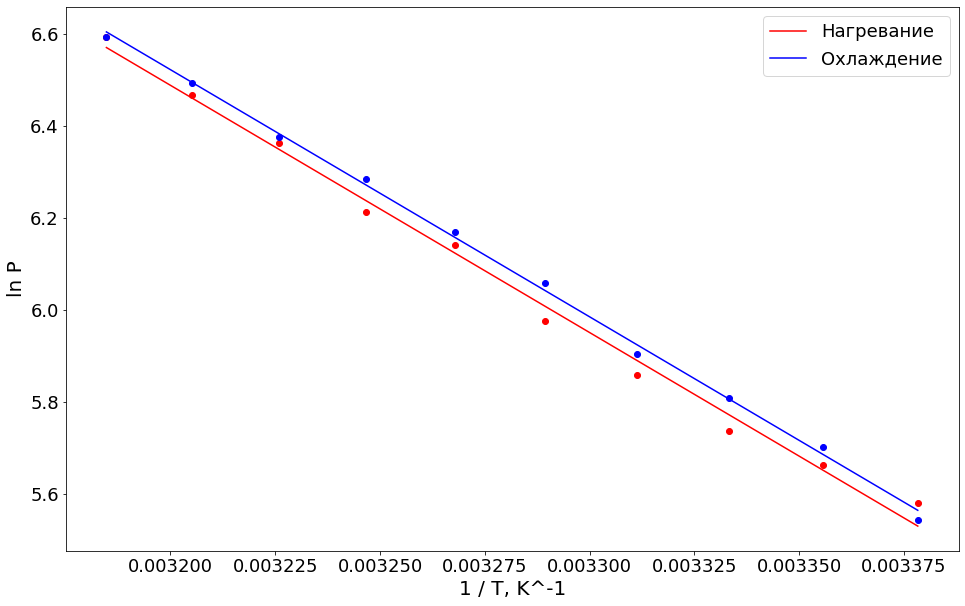

In [356]:
plt.figure(figsize=(16, 10))
plt.scatter (one_over_T_h, ln_P_h, color="red" )
plt.plot (poly_X_h, poly_Y_h, color="red", label="Нагревание")

plt.scatter (one_over_T_c, ln_P_c, color="blue" )
plt.plot (poly_X_c, poly_Y_c, color="blue", label="Охлаждение")

plt.xlabel ("1 / T, K^-1", fontdict={"size": 20})
plt.ylabel ("ln P", fontdict={"size": 20})
plt.legend()
plt.savefig ("ln_p_from_1_over_T.png")
plt.show()

In [357]:
A_h, A_c

(-5375.665987105688, -5373.784609821788)

In [358]:
L_h = -R * A_h 
L_c = -R * A_c
L_h, L_c 

(44725.541012719324, 44709.887953717276)

In [359]:
L_h / 18, L_c / 18, 

(2484.752278484407, 2483.8826640954044)

In [360]:
0.03 / 2.483 * 100

1.2082158679017316

In [363]:

np.mean([np.mean(L_h_tabl) / 18, np.mean(L_c_tabl) / 18])

2448.3550307986316